In [1]:
import sys
sys.path.append(rf"/Users/baia/Desktop/PYTHON/mba_dsa_usp_esalq")

from TCC.utils.constantes import *
import matplotlib.pyplot as plt

## TOTAL3 (Altcoin Market Cap (Excluding ETH & Stablecoins, BTC)

- O valor de mercado total de todas as criptomoedas, subtraindo Bitcoin, Ethereum e Stablecoins. Muitas vezes representado pelo ticker TOTAL3 no TradingView.

start_date: '2014-04-01'

In [2]:
df_eth_onchain_metrics = pd.read_csv(rf"raw/201501_mkcap_total3.csv")
df_eth_onchain_metrics['Data_UTC'] = pd.to_datetime(df_eth_onchain_metrics['time'], unit='s', utc=True).dt.strftime("%Y-%m-%d")
df_eth_onchain_metrics = df_eth_onchain_metrics.query("Data_UTC > '2015-08-06'")
# df_eth_onchain_metrics = df_eth_onchain_metrics.query("Data_UTC > '2015-08-06'")


df_base = df_eth_onchain_metrics.copy()
df_base = df_base.rename(columns={'Transaction Volume (ETH)':'transaction_volume_eth',
                                  'Transaction Volume USD (ETH)':'transaction_volume_usdc'
                                  })

df_base

,time,open,high,low,close,Volume,Data_UTC
490,1438905600,70583679,73395369,64092375,69082409,8.100662e+06,2015-08-07
491,1438992000,69172331,71019396,62503175,64473026,8.100662e+06,2015-08-08
492,1439078400,64555095,70459994,63110019,65364416,6.951465e+06,2015-08-09
493,1439164800,65182307,68818285,63337358,65497720,6.951465e+06,2015-08-10
494,1439251200,64932997,69030024,63249237,66821401,6.951465e+06,2015-08-11
...,...,...,...,...,...,...,...
4181,1762300800,628362452772,664035917757,600511373896,654225555290,4.441953e+10,2025-11-05
4182,1762387200,654093509774,665166972210,619069121256,635197220266,3.781748e+10,2025-11-06
4183,1762473600,635500828748,695669272430,620682148719,679626318250,7.546695e+10,2025-11-07
4184,1762560000,679587241686,693799111747,654440838219,669700455613,5.809150e+10,2025-11-08


In [3]:
print("TOTAL3 features")
df_onchain_features = (
    df_base
    # 1. Garante que temos as colunas base necessárias
    # [['Data_UTC', 'transaction_volume_eth', 'transaction_volume_usdc', 'daily_onchain_trans_profit_to_loss_ratio', 'amount_of_holders_eth','gas_used_eth','eth_spent_over_time']]
)

df_base = df_onchain_features.copy()
df_base['Data_UTC'] = pd.to_datetime(df_onchain_features['Data_UTC'], utc=True,).dt.strftime("%Y-%m-%d")
df_base['Data_UTC'] = pd.to_datetime(df_onchain_features['Data_UTC'], utc=True,)
# Visualizar as primeiras linhas
df_base#.dtypes

TOTAL3 features


,time,open,high,low,close,Volume,Data_UTC
490,1438905600,70583679,73395369,64092375,69082409,8.100662e+06,2015-08-07 00:00:00+00:00
491,1438992000,69172331,71019396,62503175,64473026,8.100662e+06,2015-08-08 00:00:00+00:00
492,1439078400,64555095,70459994,63110019,65364416,6.951465e+06,2015-08-09 00:00:00+00:00
493,1439164800,65182307,68818285,63337358,65497720,6.951465e+06,2015-08-10 00:00:00+00:00
494,1439251200,64932997,69030024,63249237,66821401,6.951465e+06,2015-08-11 00:00:00+00:00
...,...,...,...,...,...,...,...
4181,1762300800,628362452772,664035917757,600511373896,654225555290,4.441953e+10,2025-11-05 00:00:00+00:00
4182,1762387200,654093509774,665166972210,619069121256,635197220266,3.781748e+10,2025-11-06 00:00:00+00:00
4183,1762473600,635500828748,695669272430,620682148719,679626318250,7.546695e+10,2025-11-07 00:00:00+00:00
4184,1762560000,679587241686,693799111747,654440838219,669700455613,5.809150e+10,2025-11-08 00:00:00+00:00


In [4]:
df_eth_processed = (
    df_base
    .sort_values('Data_UTC')
    .rename(columns={'close': 'close_price_usdc'})
    
    # 1. Tratamento Logarítmico (Suaviza a escala exponencial)
    # Transforma "1 bilhão" e "100 milhões" em distâncias comparáveis estatisticamente
    .assign(TOTAL3_mkcap_Log = lambda df: np.log(df['close_price_usdc'] + 1)) # +1 evita erro log(0)
    
    # 2. Variação Diária (O pulso da atividade)
    # Positivo: A atividade na rede Ethereum está acelerando (Risco On)
    # Negativo: A atividade está esfriando (Possível volta pro BTC)
    .assign(TOTAL3_mkcap_Diff = lambda df: df['TOTAL3_mkcap_Log'].diff())
    
    # Seleção Final
    [['Data_UTC', 'close_price_usdc','TOTAL3_mkcap_Log','TOTAL3_mkcap_Diff']]
)

df_eth_processed

,Data_UTC,close_price_usdc,TOTAL3_mkcap_Log,TOTAL3_mkcap_Diff
490,2015-08-07 00:00:00+00:00,69082409,18.050811,NaN
491,2015-08-08 00:00:00+00:00,64473026,17.981758,-0.069053
492,2015-08-09 00:00:00+00:00,65364416,17.995489,0.013731
493,2015-08-10 00:00:00+00:00,65497720,17.997526,0.002037
494,2015-08-11 00:00:00+00:00,66821401,18.017534,0.020008
...,...,...,...,...
4181,2025-11-05 00:00:00+00:00,654225555290,27.206718,0.040542
4182,2025-11-06 00:00:00+00:00,635197220266,27.177201,-0.029517
4183,2025-11-07 00:00:00+00:00,679626318250,27.244809,0.067608
4184,2025-11-08 00:00:00+00:00,669700455613,27.230096,-0.014713


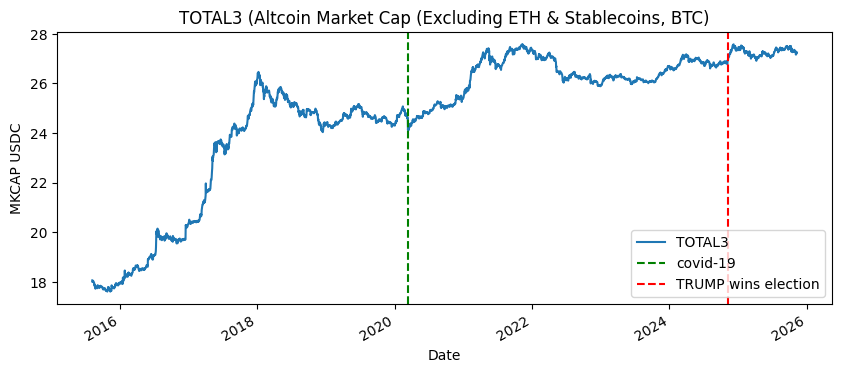

In [5]:
plt.figure(figsize=(10,4))
plt.plot(df_eth_processed['Data_UTC'], df_eth_processed['TOTAL3_mkcap_Log'], label='TOTAL3')
plt.xlabel('Date')
plt.ylabel('MKCAP USDC')
plt.axvline(pd.to_datetime('2020-03-12'), color='green', linestyle='--', label='covid-19')
plt.axvline(pd.to_datetime('2024-11-06'), color='red', linestyle='--', label='TRUMP wins election')
plt.title('TOTAL3 (Altcoin Market Cap (Excluding ETH & Stablecoins, BTC)')
plt.legend()
plt.gcf().autofmt_xdate()   # rotaciona e formata os labels de data
plt.show()


## Stablecoins Suply Ratio (SSR)

A razão entre o Market Cap do Bitcoin e o Market Cap de todas as Stablecoins.

In [6]:
df_eth_onchain_metrics = pd.read_csv(rf"raw/201404_ssr.csv")
# df_eth_onchain_metrics['Data_UTC'] = pd.to_datetime(df_eth_onchain_metrics['time'], unit='s', utc=True).dt.strftime("%Y-%m-%d")
df_eth_onchain_metrics= df_eth_onchain_metrics.assign(Data_UTC = pd.to_datetime(df_eth_onchain_metrics['time']))
df_eth_onchain_metrics = df_eth_onchain_metrics.query("Data_UTC > '2015-09-22'")

df_base = df_eth_onchain_metrics.copy()
df_base = df_base.rename(columns={'close':'close_price_usdc'})

df_base[['Data_UTC','close_price_usdc','SSR']]

,Data_UTC,close_price_usdc,SSR
537,2015-09-23,53526049,0.729450
538,2015-09-24,53550018,0.746362
539,2015-09-25,52648504,0.753769
540,2015-09-26,52562088,0.752400
541,2015-09-27,52748102,0.752530
...,...,...,...
4225,2025-12-19,547263194717,0.744615
4226,2025-12-20,550367021744,0.747546
4227,2025-12-21,549378001989,0.749867
4228,2025-12-22,547941400818,0.750404


In [7]:
df_ssr_processed = (
    df_base
    .sort_values('Data_UTC')
    
    # 1. Tratamento Logarítmico (Suaviza a escala exponencial)
    # Transforma "1 bilhão" e "100 milhões" em distâncias comparáveis estatisticamente
    # .assign(TOTAL3_mkcap_Log = lambda df: np.log(df['close_price_usdc'] + 1)) # +1 evita erro log(0)
    
    # 2. Variação Diária (O pulso da atividade)
    # Positivo: A atividade na rede Ethereum está acelerando (Risco On)
    # Negativo: A atividade está esfriando (Possível volta pro BTC)
    .assign(SSR_Zscore_Diff = lambda df: df['SSR'].diff())
    
    # Seleção Final
    [['Data_UTC','close_price_usdc','SSR','SSR_Zscore_Diff']]
)

df_ssr_processed

,Data_UTC,close_price_usdc,SSR,SSR_Zscore_Diff
537,2015-09-23,53526049,0.729450,NaN
538,2015-09-24,53550018,0.746362,0.016913
539,2015-09-25,52648504,0.753769,0.007407
540,2015-09-26,52562088,0.752400,-0.001369
541,2015-09-27,52748102,0.752530,0.000130
...,...,...,...,...
4225,2025-12-19,547263194717,0.744615,0.024278
4226,2025-12-20,550367021744,0.747546,0.002930
4227,2025-12-21,549378001989,0.749867,0.002321
4228,2025-12-22,547941400818,0.750404,0.000537


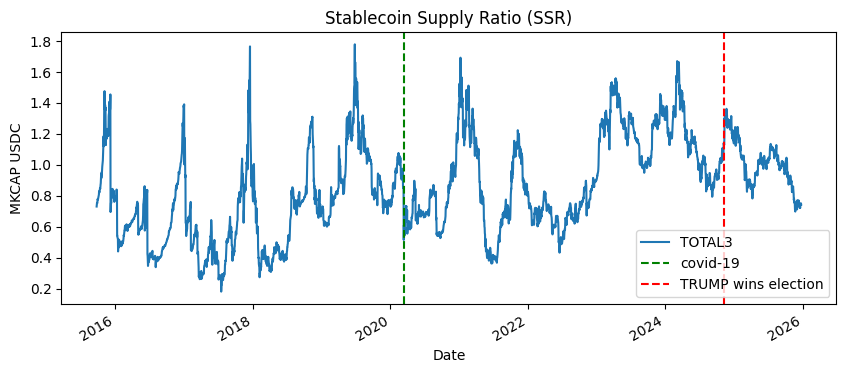

In [8]:
plt.figure(figsize=(10,4))
plt.plot(df_ssr_processed['Data_UTC'], df_ssr_processed['SSR'], label='TOTAL3')
plt.xlabel('Date')
plt.ylabel('MKCAP USDC')
plt.axvline(pd.to_datetime('2020-03-12'), color='green', linestyle='--', label='covid-19')
plt.axvline(pd.to_datetime('2024-11-06'), color='red', linestyle='--', label='TRUMP wins election')
plt.title('Stablecoin Supply Ratio (SSR)')
plt.legend()
plt.gcf().autofmt_xdate()   # rotaciona e formata os labels de data
plt.show()


## Flippening Index (ETH_Cap/BTC_Cap)

Diferença diária da razão ETH_Cap / BTC_Cap. Mede a velocidade com que o Ethereum ganha ou perde terreno frente ao Bitcoin, ajustado pela oferta (supply) de ambos.

In [9]:
df_eth_onchain_metrics = pd.read_csv(rf"raw/201809_Flippening_Ratio_Diff.csv")
# df_eth_onchain_metrics['Data_UTC'] = pd.to_datetime(df_eth_onchain_metrics['time'], unit='s', utc=True).dt.strftime("%Y-%m-%d")
df_eth_onchain_metrics= df_eth_onchain_metrics.assign(Data_UTC = pd.to_datetime(df_eth_onchain_metrics['time']))
df_eth_onchain_metrics = df_eth_onchain_metrics.query("Data_UTC > '2015-09-22'")

df_base = df_eth_onchain_metrics.copy()
df_base = df_base.rename(columns={'close':'close_index'})

df_base[['Data_UTC','close_index']]

,Data_UTC,close_index
0,2018-09-15,0.203268
1,2018-09-16,0.201525
2,2018-09-17,0.179760
3,2018-09-18,0.190791
4,2018-09-19,0.192062
...,...,...
2653,2025-12-20,0.203741
2654,2025-12-21,0.204723
2655,2025-12-22,0.205293
2656,2025-12-23,0.204859


In [10]:
df_flippening_index_processed = (
    df_base
    .sort_values('Data_UTC')
    
    # 1. Tratamento Logarítmico (Suaviza a escala exponencial)
    # Transforma "1 bilhão" e "100 milhões" em distâncias comparáveis estatisticamente
    .assign(close_index_Log = lambda df: np.log(df['close_index'] + 1)) # +1 evita erro log(0)
    
    # 2. Variação Diária (O pulso da atividade)
    # Positivo: A atividade na rede Ethereum está acelerando (Risco On)
    # Negativo: A atividade está esfriando (Possível volta pro BTC)
    .assign(close_index_Diff = lambda df: df['close_index_Log'].diff())
    
    # Seleção Final
    [['Data_UTC','close_index','close_index_Diff']]
)

df_flippening_index_processed

,Data_UTC,close_index,close_index_Diff
0,2018-09-15,0.203268,NaN
1,2018-09-16,0.201525,-0.001449
2,2018-09-17,0.179760,-0.018280
3,2018-09-18,0.190791,0.009307
4,2018-09-19,0.192062,0.001067
...,...,...,...
2653,2025-12-20,0.203741,-0.000521
2654,2025-12-21,0.204723,0.000816
2655,2025-12-22,0.205293,0.000473
2656,2025-12-23,0.204859,-0.000360


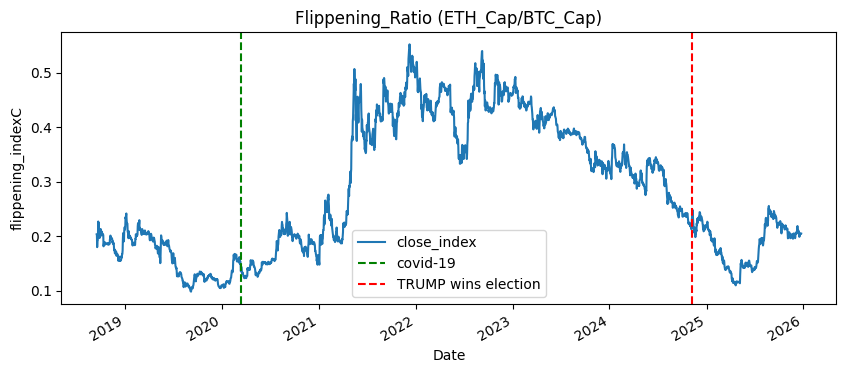

In [13]:
plt.figure(figsize=(10,4))
plt.plot(df_flippening_index_processed['Data_UTC'], df_flippening_index_processed['close_index'], label='close_index')
plt.xlabel('Date')
plt.ylabel('flippening_indexC')
plt.axvline(pd.to_datetime('2020-03-12'), color='green', linestyle='--', label='covid-19')
plt.axvline(pd.to_datetime('2024-11-06'), color='red', linestyle='--', label='TRUMP wins election')
plt.title('Flippening_Ratio (ETH_Cap/BTC_Cap)')
plt.legend()
plt.gcf().autofmt_xdate()   # rotaciona e formata os labels de data
plt.show()
